In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn import metrics

In [2]:
data=pd.read_csv("Data_Complete.csv")
data

,S,L,D,H,WW,SW,VW,SlW,Response1
0,I,0.455,0.375,0.125,0.5330,0.2330,0.1060,0.185,8
1,M,0.630,0.490,0.155,1.2525,0.6300,0.2460,0.289,9
2,M,0.695,0.550,0.220,1.5515,0.5660,0.3835,0.445,13
3,I,0.430,0.320,0.100,0.3855,0.1920,0.0745,0.100,7
4,I,0.420,0.320,0.110,0.3625,0.1740,0.0635,0.105,7
...,...,...,...,...,...,...,...,...,...
2995,F,0.575,0.485,0.165,1.0405,0.4190,0.2640,0.300,14
2996,M,0.515,0.370,0.115,0.6145,0.3415,0.1550,0.146,9
2997,M,0.590,0.475,0.160,0.9455,0.3815,0.1840,0.270,19
2998,F,0.605,0.495,0.170,1.2385,0.5280,0.2465,0.390,14


In [3]:
df=pd.DataFrame(data)
df

,S,L,D,H,WW,SW,VW,SlW,Response1
0,I,0.455,0.375,0.125,0.5330,0.2330,0.1060,0.185,8
1,M,0.630,0.490,0.155,1.2525,0.6300,0.2460,0.289,9
2,M,0.695,0.550,0.220,1.5515,0.5660,0.3835,0.445,13
3,I,0.430,0.320,0.100,0.3855,0.1920,0.0745,0.100,7
4,I,0.420,0.320,0.110,0.3625,0.1740,0.0635,0.105,7
...,...,...,...,...,...,...,...,...,...
2995,F,0.575,0.485,0.165,1.0405,0.4190,0.2640,0.300,14
2996,M,0.515,0.370,0.115,0.6145,0.3415,0.1550,0.146,9
2997,M,0.590,0.475,0.160,0.9455,0.3815,0.1840,0.270,19
2998,F,0.605,0.495,0.170,1.2385,0.5280,0.2465,0.390,14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   S          3000 non-null   object 
 1   L          3000 non-null   float64
 2   D          3000 non-null   float64
 3   H          3000 non-null   float64
 4   WW         3000 non-null   float64
 5   SW         3000 non-null   float64
 6   VW         3000 non-null   float64
 7   SlW        3000 non-null   float64
 8   Response1  3000 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 211.1+ KB


In [5]:
df["Response1"].replace({0:"Young",1:"Young",2:"Young",3:"Young",4:"Young",5:"Young",6:"Young",7:"Young",8:"Young",
                        9:"middle",10:"middle",11:"middle",12:"middle",13:"old",14:"old",15:"old",16:"old",17:"old",
                        18:"old",19:"old",20:"old",21:"old",22:"old",23:"old",24:"old",25:"old",26:"old",27:"old"}, inplace = True)

In [6]:
df

,S,L,D,H,WW,SW,VW,SlW,Response1
0,I,0.455,0.375,0.125,0.5330,0.2330,0.1060,0.185,Young
1,M,0.630,0.490,0.155,1.2525,0.6300,0.2460,0.289,middle
2,M,0.695,0.550,0.220,1.5515,0.5660,0.3835,0.445,old
3,I,0.430,0.320,0.100,0.3855,0.1920,0.0745,0.100,Young
4,I,0.420,0.320,0.110,0.3625,0.1740,0.0635,0.105,Young
...,...,...,...,...,...,...,...,...,...
2995,F,0.575,0.485,0.165,1.0405,0.4190,0.2640,0.300,old
2996,M,0.515,0.370,0.115,0.6145,0.3415,0.1550,0.146,middle
2997,M,0.590,0.475,0.160,0.9455,0.3815,0.1840,0.270,old
2998,F,0.605,0.495,0.170,1.2385,0.5280,0.2465,0.390,old


In [7]:
df.Response1.value_counts()

middle    1484
Young     1015
old        501
Name: Response1, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   S          3000 non-null   object 
 1   L          3000 non-null   float64
 2   D          3000 non-null   float64
 3   H          3000 non-null   float64
 4   WW         3000 non-null   float64
 5   SW         3000 non-null   float64
 6   VW         3000 non-null   float64
 7   SlW        3000 non-null   float64
 8   Response1  3000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 211.1+ KB


In [9]:
df.isnull().sum()

S            0
L            0
D            0
H            0
WW           0
SW           0
VW           0
SlW          0
Response1    0
dtype: int64

In [10]:
df.describe()

,L,D,H,WW,SW,VW,SlW
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.525460,0.408830,0.139725,0.834814,0.362266,0.181598,0.240476
std,0.119308,0.098598,0.042354,0.492227,0.223287,0.110191,0.139637
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.440375,0.186000,0.092500,0.130000
50%,0.545000,0.425000,0.140000,0.802500,0.339750,0.171500,0.235000
75%,0.620000,0.485000,0.165000,1.166125,0.508125,0.255500,0.334500
max,0.815000,0.650000,1.130000,2.779500,1.351000,0.760000,1.005000


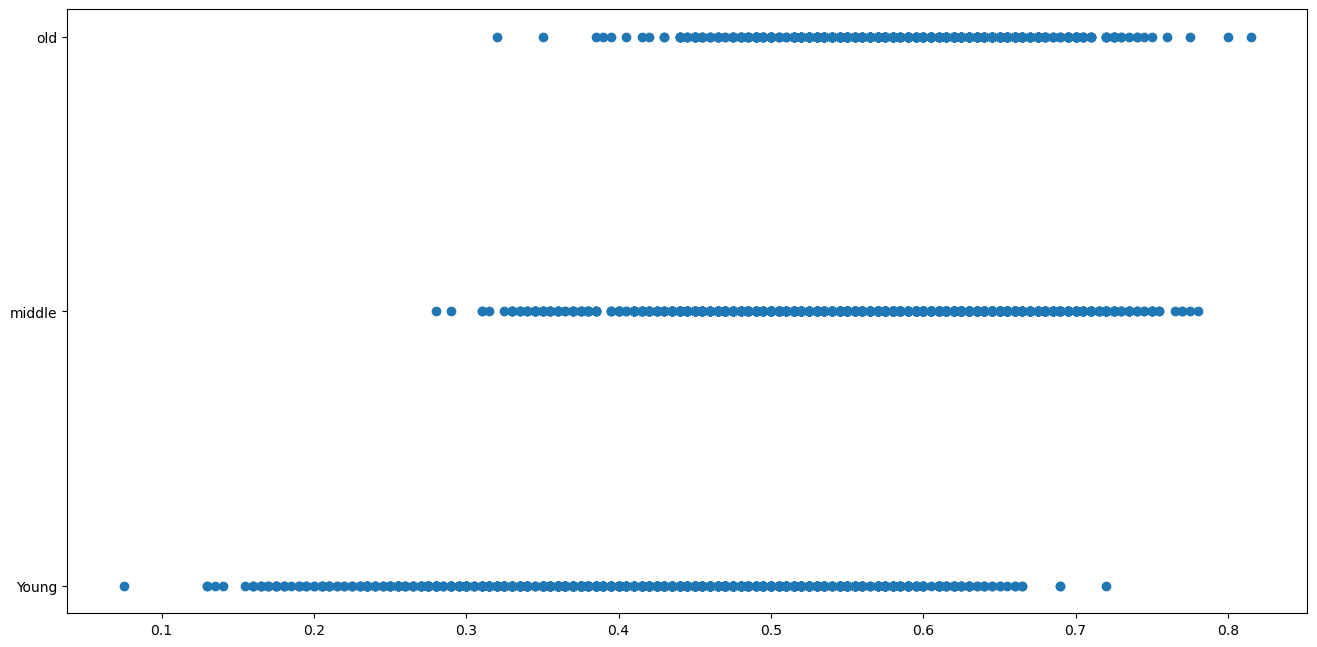

In [11]:
plt.figure(figsize=(16,8),dpi=100)
plt.scatter(df["L"],df["Response1"])
plt.show()

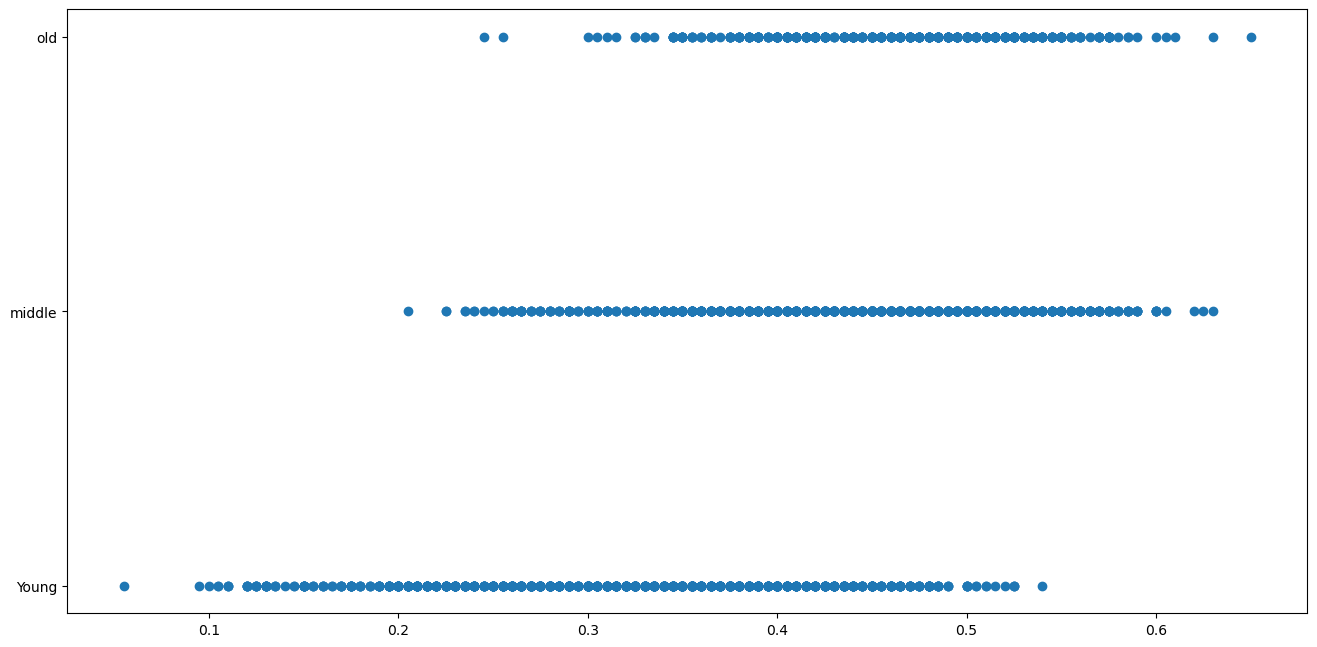

In [12]:
plt.figure(figsize=(16,8),dpi=100)
plt.scatter(df["D"],df["Response1"])
plt.show()

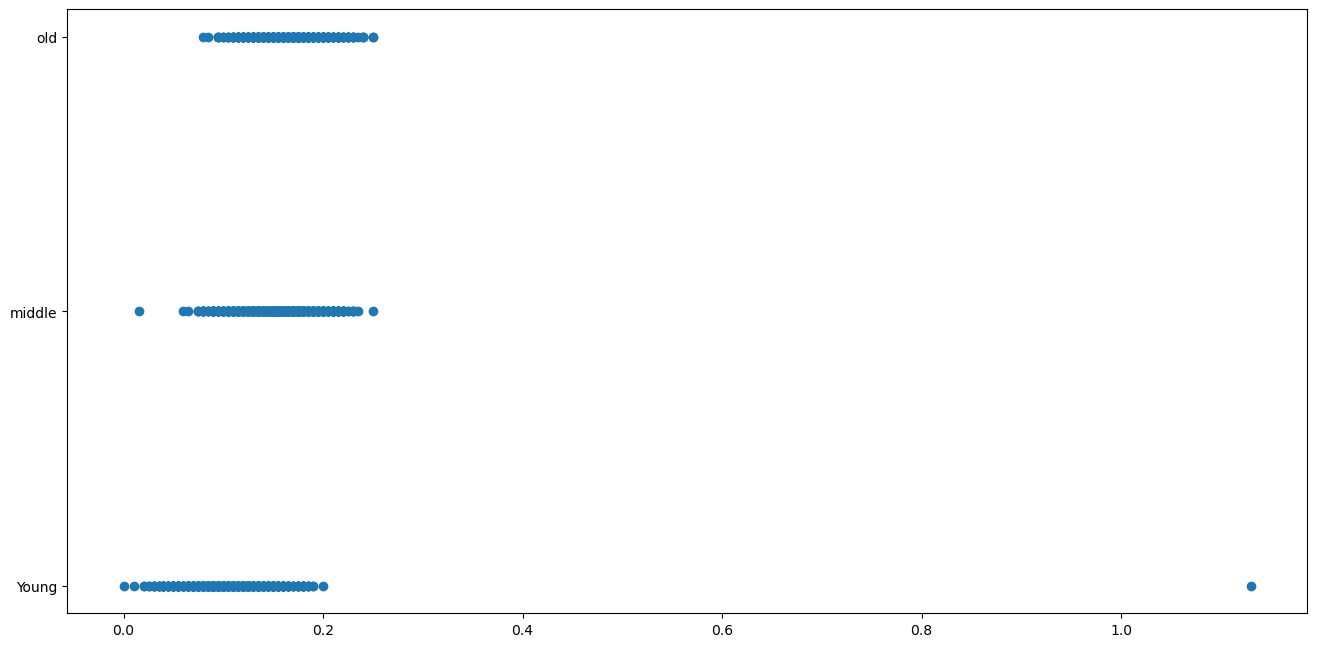

In [13]:
plt.figure(figsize=(16,8),dpi=100)
plt.scatter(df["H"],df["Response1"])
plt.show()

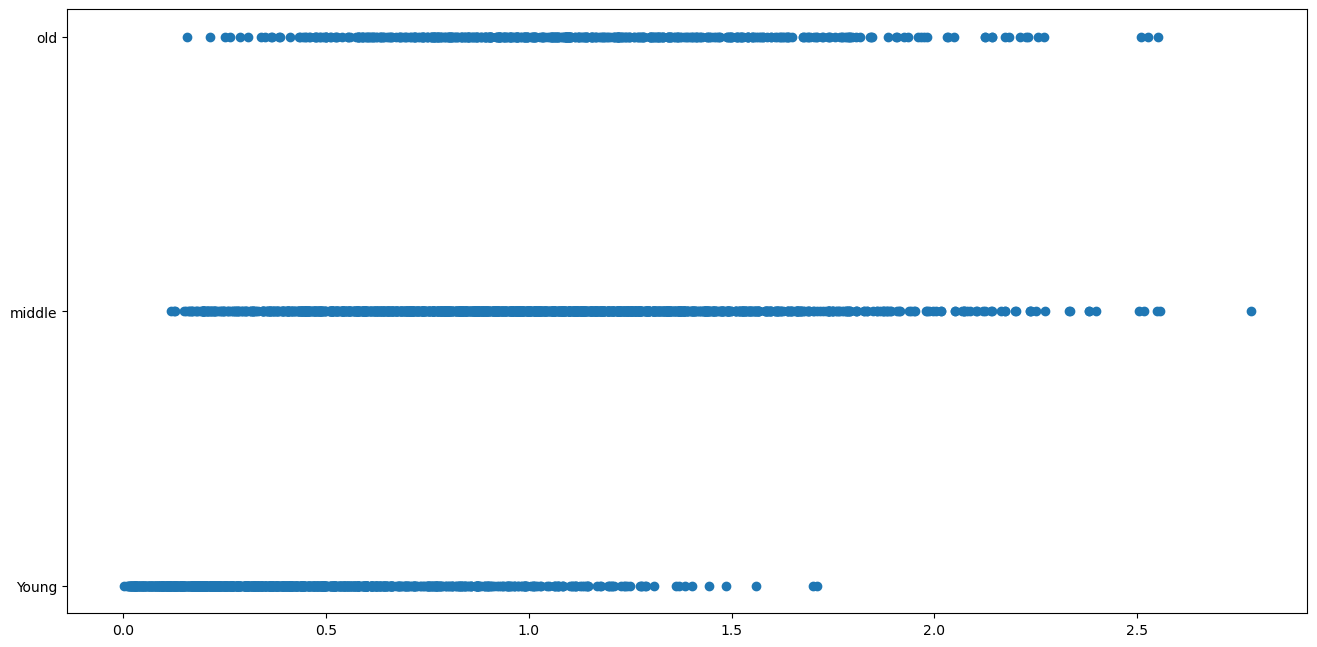

In [14]:
plt.figure(figsize=(16,8),dpi=100)
plt.scatter(df["WW"],df["Response1"])
plt.show()

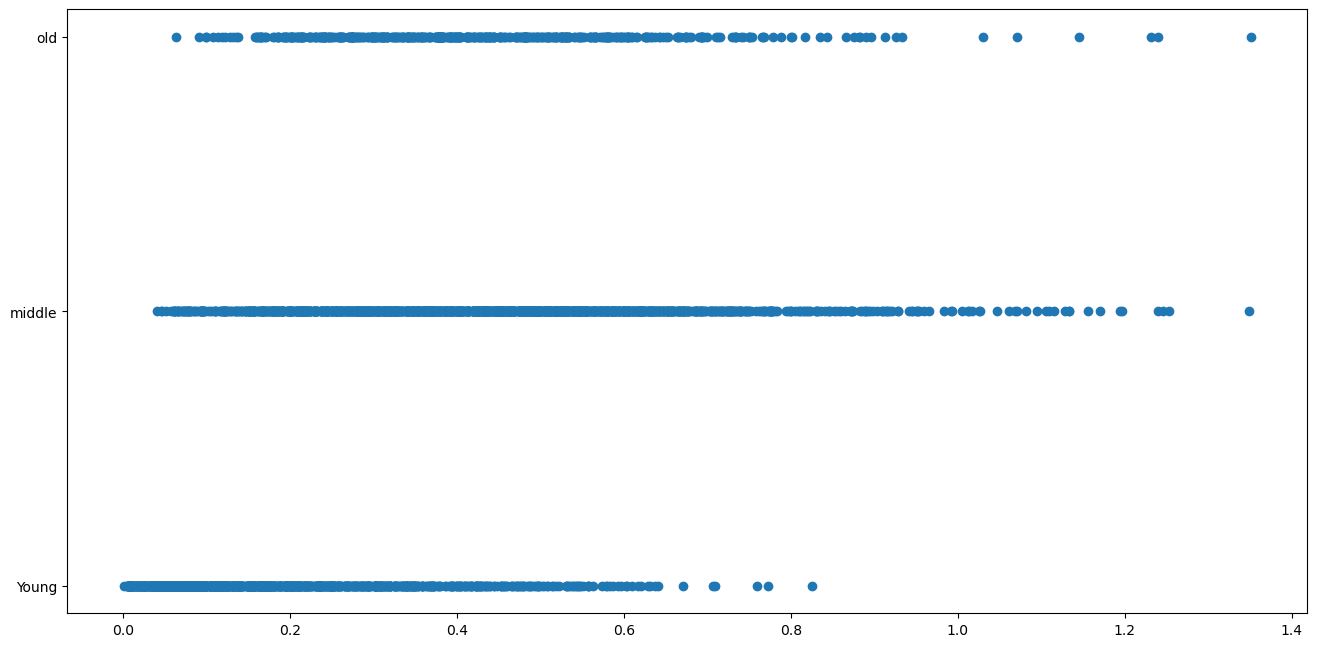

In [15]:
plt.figure(figsize=(16,8),dpi=100)
plt.scatter(df["SW"],df["Response1"])
plt.show()

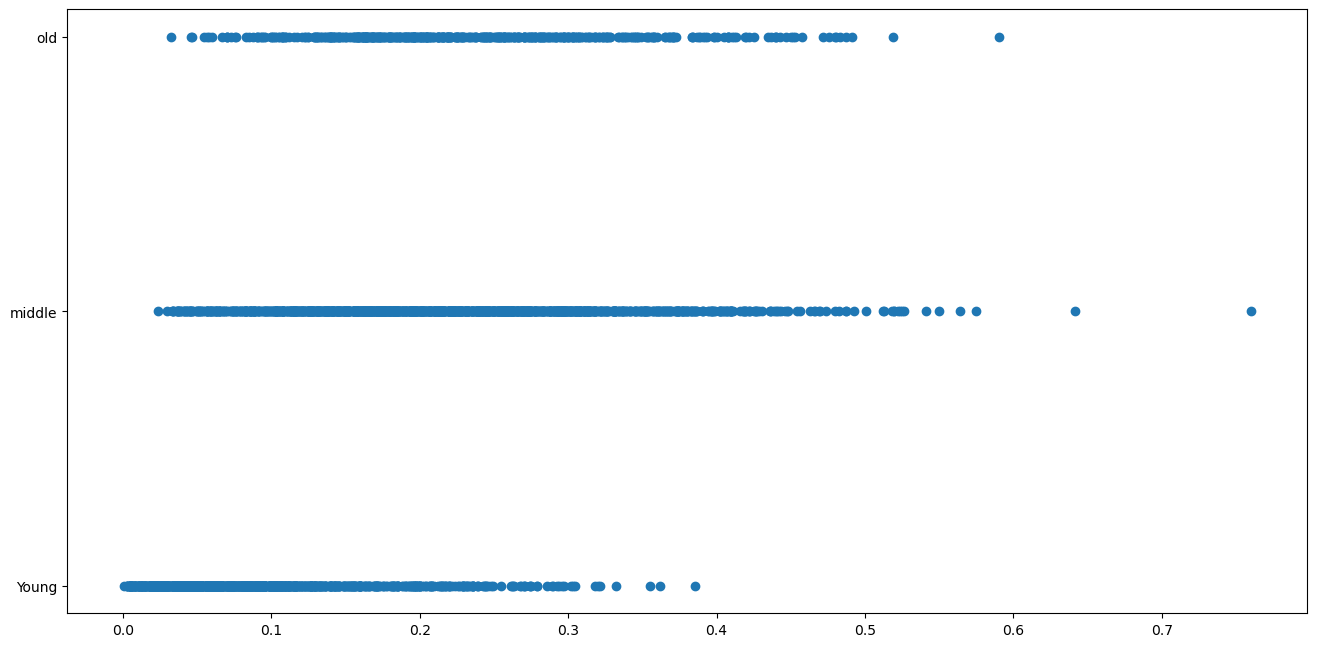

In [16]:
plt.figure(figsize=(16,8),dpi=100)
plt.scatter(df["VW"],df["Response1"])
plt.show()

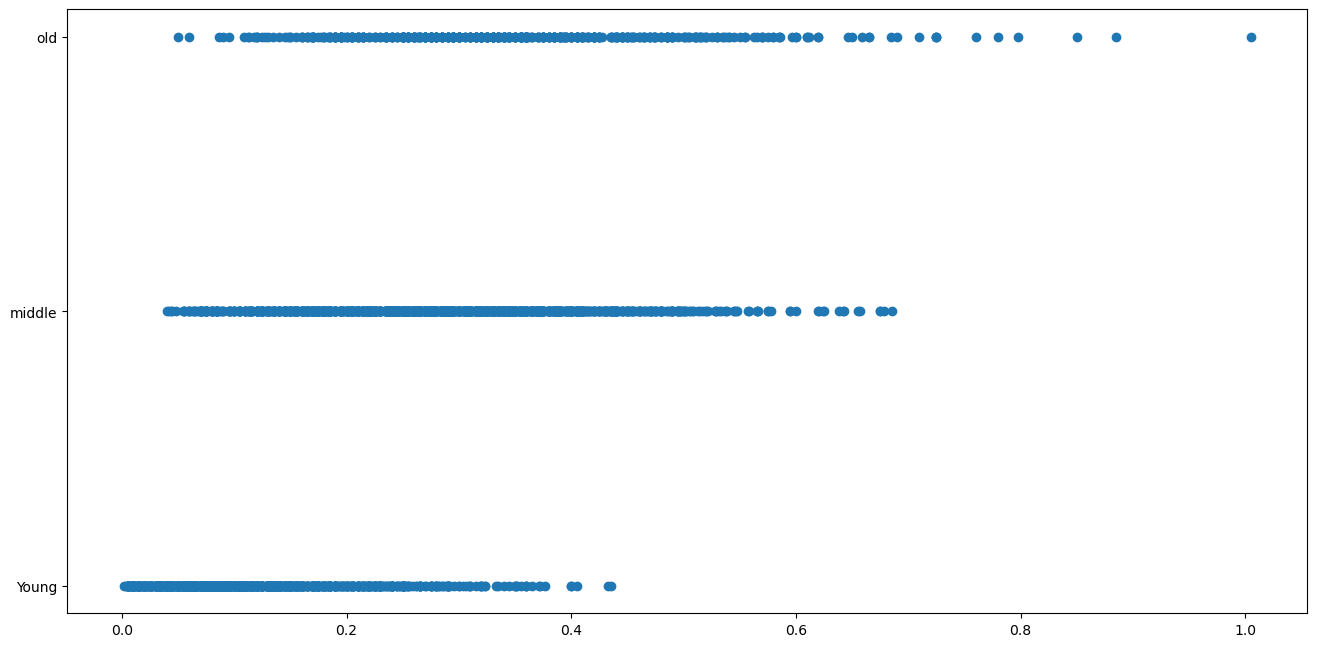

In [17]:
plt.figure(figsize=(16,8),dpi=100)
plt.scatter(df["SlW"],df["Response1"])
plt.show()

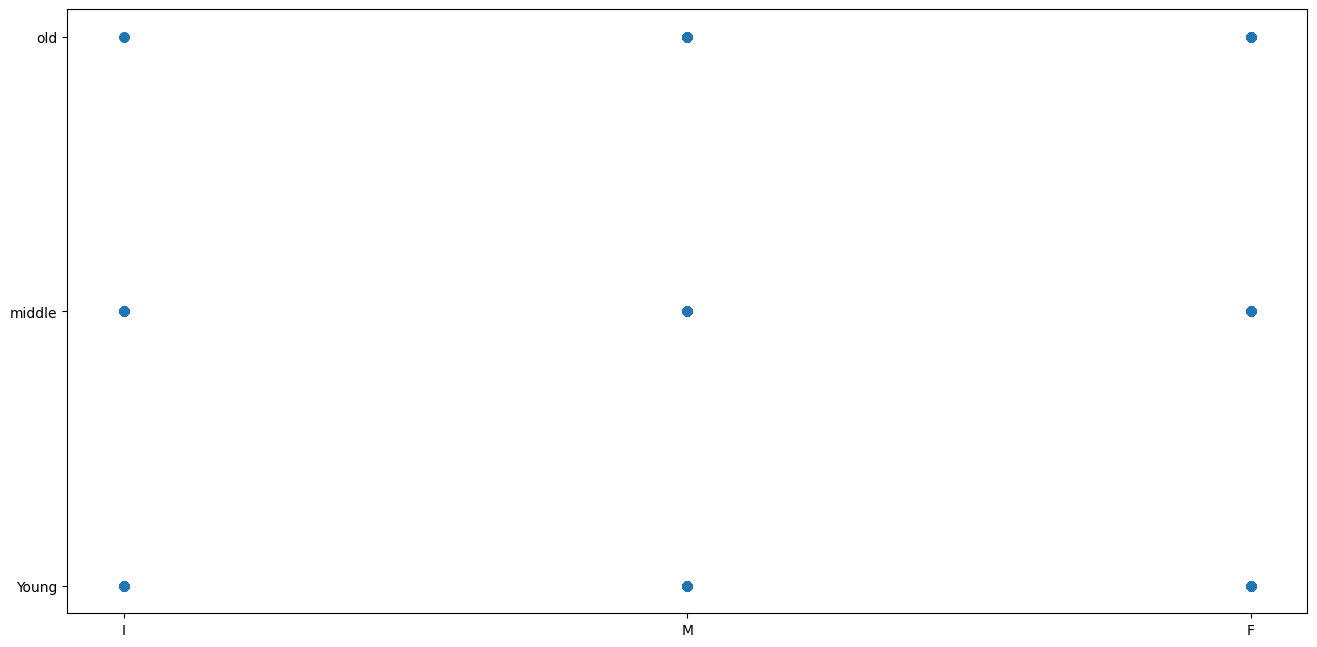

In [18]:
plt.figure(figsize=(16,8),dpi=100)
plt.scatter(df["S"],df["Response1"])
plt.show()

In [19]:
df.L.nsmallest(10)

2869    0.075
709     0.130
2490    0.130
1304    0.135
382     0.140
1434    0.155
59      0.160
631     0.160
1741    0.160
536     0.165
Name: L, dtype: float64

In [20]:
df.L.nlargest(10)

2734    0.815
2273    0.800
1866    0.780
94      0.775
757     0.775
1136    0.770
1658    0.770
550     0.765
2818    0.760
2121    0.755
Name: L, dtype: float64

In [21]:
df.D.nsmallest(10)

2869    0.055
2490    0.095
709     0.100
382     0.105
2725    0.105
59      0.110
1309    0.110
1434    0.110
536     0.120
557     0.120
Name: D, dtype: float64

In [22]:
df.D.nlargest(10)

2734    0.650
94      0.630
2273    0.630
2121    0.625
1136    0.620
1648    0.610
1658    0.605
2818    0.605
373     0.600
1629    0.600
Name: D, dtype: float64

In [23]:
df.H.nsmallest(10)

1722    0.000
2869    0.010
1921    0.015
631     0.020
1309    0.020
59      0.025
1160    0.025
536     0.030
709     0.030
818     0.030
Name: H, dtype: float64

In [24]:
df.H.nlargest(10)

2633    1.130
94      0.250
2459    0.250
2734    0.250
415     0.240
923     0.240
1340    0.240
1648    0.235
1725    0.235
373     0.230
Name: H, dtype: float64

In [25]:
df.WW.nsmallest(10)

2869    0.0020
2490    0.0105
709     0.0130
382     0.0145
1434    0.0155
631     0.0180
1309    0.0190
59      0.0195
1289    0.0210
1741    0.0210
Name: WW, dtype: float64

In [26]:
df.WW.nlargest(10)

94      2.7795
1629    2.5550
1940    2.5500
1866    2.5480
2273    2.5260
1136    2.5155
1648    2.5085
2121    2.5050
550     2.3980
23      2.3810
Name: WW, dtype: float64

In [27]:
df.SW.nlargest(10)

415     1.3510
94      1.3485
1863    1.2530
2154    1.2455
1453    1.2395
2987    1.2395
1648    1.2320
2121    1.1965
1866    1.1945
2229    1.1705
Name: SW, dtype: float64

In [28]:
df.SW.nsmallest(10)

2869    0.0010
709     0.0045
382     0.0050
2490    0.0050
1309    0.0065
1434    0.0065
536     0.0070
59      0.0075
631     0.0075
1289    0.0075
Name: SW, dtype: float64

In [29]:
df.VW.nlargest(10)

94      0.7600
1136    0.6415
2273    0.5900
1866    0.5745
1117    0.5640
2041    0.5500
1863    0.5410
1658    0.5260
2070    0.5250
531     0.5235
Name: VW, dtype: float64

In [30]:
df.VW.nsmallest(10)

2869    0.0005
1309    0.0025
709     0.0030
1434    0.0030
382     0.0035
1124    0.0035
631     0.0045
1289    0.0045
1741    0.0045
59      0.0050
Name: VW, dtype: float64

In [31]:
df.SlW.nlargest(10)

988     1.0050
312     0.8850
2501    0.8500
2734    0.7975
892     0.7800
567     0.7600
1940    0.7250
2630    0.7250
2898    0.7250
2443    0.7100
Name: SlW, dtype: float64

In [32]:
df.median()

L      0.54500
D      0.42500
H      0.14000
WW     0.80250
SW     0.33975
VW     0.17150
SlW    0.23500
dtype: float64

In [33]:
df.fillna(data.median(), inplace=True)

C:\Users\Parisan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Parisan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Parisan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Parisan\anaconda

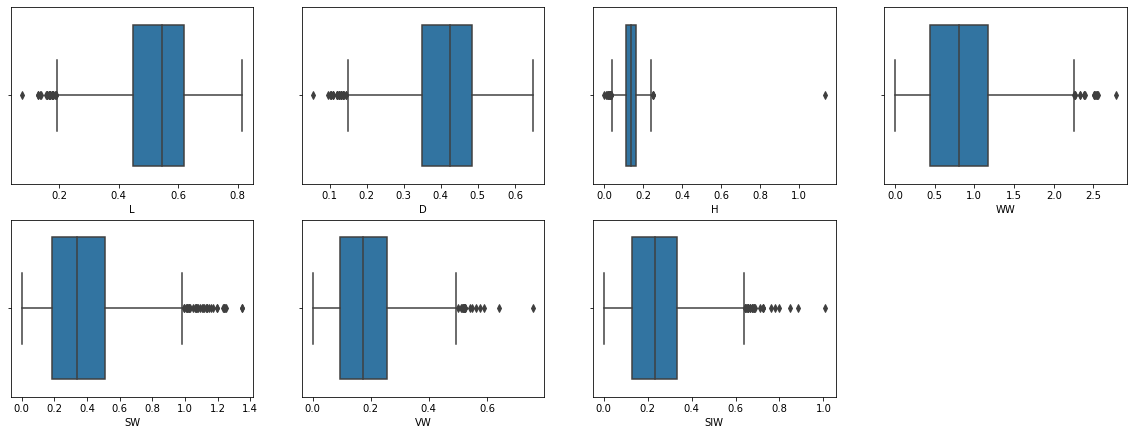

In [34]:
plt.figure(figsize=(20,15))

plt.subplot(4,4,1)
sb.boxplot(df["L"])

plt.subplot(4,4,2)
sb.boxplot(df["D"])

plt.subplot(4,4,3)
sb.boxplot(df["H"])

plt.subplot(4,4,4)
sb.boxplot(df["WW"])


plt.subplot(4,4,5)
sb.boxplot(df["SW"])

plt.subplot(4,4,6)
sb.boxplot(df["VW"])

plt.subplot(4,4,7)
sb.boxplot(df["SlW"])

plt.show()

In [35]:
df["L"]=df["L"].clip(lower=df["L"].quantile(0.05),upper=df["L"].quantile(0.95))

df["D"]=df["D"].clip(lower=df["D"].quantile(0.05),upper=df["D"].quantile(0.95))

df["H"]=df["H"].clip(lower=df["H"].quantile(0.05),upper=df["H"].quantile(0.95))

df["WW"]=df["WW"].clip(lower=df["WW"].quantile(0.05),upper=df["WW"].quantile(0.95))

df["SW"]=df["SW"].clip(lower=df["SW"].quantile(0.05),upper=df["SW"].quantile(0.95))

df["VW"]=df["VW"].clip(lower=df["VW"].quantile(0.05),upper=df["VW"].quantile(0.95))

df["SlW"]=df["SlW"].clip(lower=df["SlW"].quantile(0.05),upper=df["SlW"].quantile(0.95))

C:\Users\Parisan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Parisan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Parisan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Parisan\anaconda

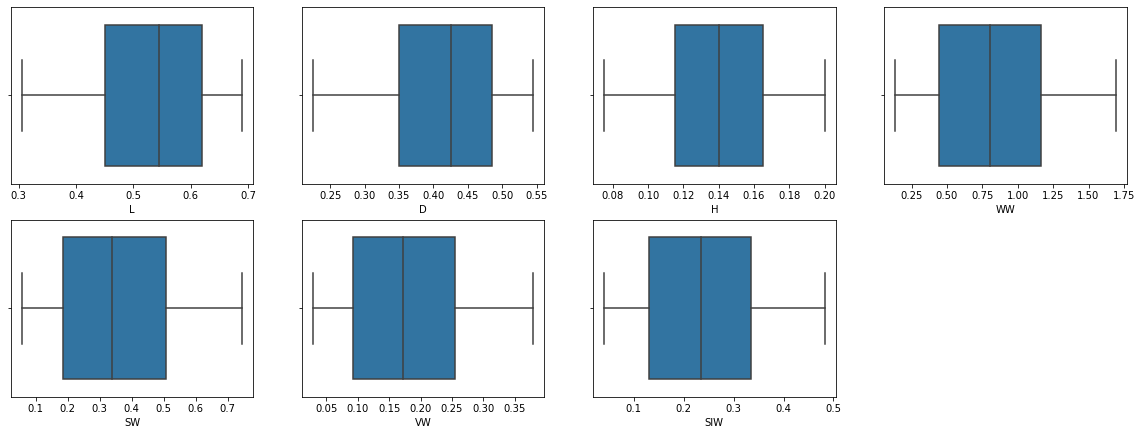

In [36]:
plt.figure(figsize=(20,15))

plt.subplot(4,4,1)
sb.boxplot(df["L"])

plt.subplot(4,4,2)
sb.boxplot(df["D"])

plt.subplot(4,4,3)
sb.boxplot(df["H"])

plt.subplot(4,4,4)
sb.boxplot(df["WW"])


plt.subplot(4,4,5)
sb.boxplot(df["SW"])

plt.subplot(4,4,6)
sb.boxplot(df["VW"])

plt.subplot(4,4,7)
sb.boxplot(df["SlW"])

plt.show()

In [37]:
df

,S,L,D,H,WW,SW,VW,SlW,Response1
0,I,0.455,0.375,0.125,0.5330,0.2330,0.106000,0.185,Young
1,M,0.630,0.490,0.155,1.2525,0.6300,0.246000,0.289,middle
2,M,0.690,0.545,0.200,1.5515,0.5660,0.379525,0.445,old
3,I,0.430,0.320,0.100,0.3855,0.1920,0.074500,0.100,Young
4,I,0.420,0.320,0.110,0.3625,0.1740,0.063500,0.105,Young
...,...,...,...,...,...,...,...,...,...
2995,F,0.575,0.485,0.165,1.0405,0.4190,0.264000,0.300,old
2996,M,0.515,0.370,0.115,0.6145,0.3415,0.155000,0.146,middle
2997,M,0.590,0.475,0.160,0.9455,0.3815,0.184000,0.270,old
2998,F,0.605,0.495,0.170,1.2385,0.5280,0.246500,0.390,old


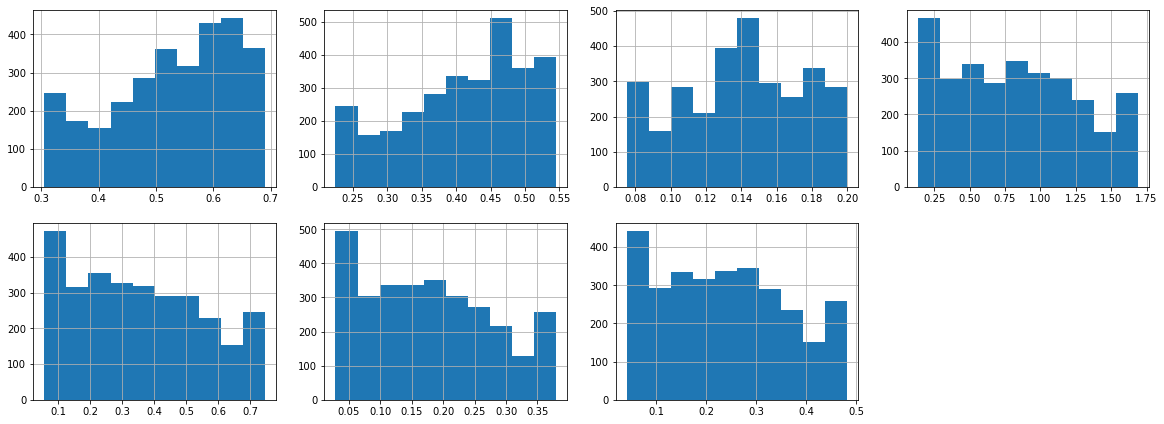

In [38]:
plt.figure(figsize=(20,15))

plt.subplot(4,4,1)
plt.hist(df["L"])
plt.grid()

plt.subplot(4,4,2)
plt.hist(df["D"])
plt.grid()

plt.subplot(4,4,3)
plt.hist(df["H"])
plt.grid()

plt.subplot(4,4,4)
plt.hist(df["WW"])
plt.grid()

plt.subplot(4,4,5)
plt.hist(df["SW"])
plt.grid()

plt.subplot(4,4,6)
plt.hist(df["VW"])
plt.grid()

plt.subplot(4,4,7)
plt.hist(df["SlW"])

plt.grid()

plt.show()

Correlation Matrix 



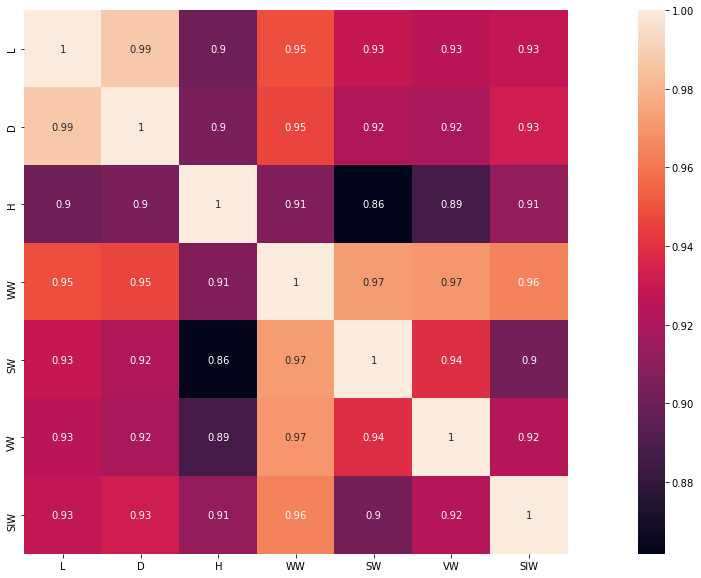

In [39]:
#heatmap
print("Correlation Matrix", "\n")
correlation = df.corr(method = "pearson")
plt.figure(figsize = (25,10))
sb.heatmap(correlation, vmax=1, square = True, annot = True)
plt.show()

In [40]:
df.drop(["S"], axis =1, inplace =True)

In [41]:
df

,L,D,H,WW,SW,VW,SlW,Response1
0,0.455,0.375,0.125,0.5330,0.2330,0.106000,0.185,Young
1,0.630,0.490,0.155,1.2525,0.6300,0.246000,0.289,middle
2,0.690,0.545,0.200,1.5515,0.5660,0.379525,0.445,old
3,0.430,0.320,0.100,0.3855,0.1920,0.074500,0.100,Young
4,0.420,0.320,0.110,0.3625,0.1740,0.063500,0.105,Young
...,...,...,...,...,...,...,...,...
2995,0.575,0.485,0.165,1.0405,0.4190,0.264000,0.300,old
2996,0.515,0.370,0.115,0.6145,0.3415,0.155000,0.146,middle
2997,0.590,0.475,0.160,0.9455,0.3815,0.184000,0.270,old
2998,0.605,0.495,0.170,1.2385,0.5280,0.246500,0.390,old


In [42]:
x=pd.DataFrame(df, columns=["L","D","H","WW","SW","VW","SlW"])
y=df.Response1.values.reshape(-1,1)

In [43]:
x

,L,D,H,WW,SW,VW,SlW
0,0.455,0.375,0.125,0.5330,0.2330,0.106000,0.185
1,0.630,0.490,0.155,1.2525,0.6300,0.246000,0.289
2,0.690,0.545,0.200,1.5515,0.5660,0.379525,0.445
3,0.430,0.320,0.100,0.3855,0.1920,0.074500,0.100
4,0.420,0.320,0.110,0.3625,0.1740,0.063500,0.105
...,...,...,...,...,...,...,...
2995,0.575,0.485,0.165,1.0405,0.4190,0.264000,0.300
2996,0.515,0.370,0.115,0.6145,0.3415,0.155000,0.146
2997,0.590,0.475,0.160,0.9455,0.3815,0.184000,0.270
2998,0.605,0.495,0.170,1.2385,0.5280,0.246500,0.390


In [44]:
y

array([['Young'],
       ['middle'],
       ['old'],
       ...,
       ['old'],
       ['old'],
       ['middle']], dtype=object)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [46]:
x_train

,L,D,H,WW,SW,VW,SlW
2370,0.385,0.285,0.105,0.2905,0.1215,0.0685,0.08750
1774,0.340,0.260,0.085,0.1885,0.0815,0.0335,0.06000
731,0.625,0.495,0.155,1.1770,0.5055,0.2780,0.34500
271,0.605,0.475,0.175,1.2010,0.5395,0.2750,0.30900
1077,0.465,0.360,0.080,0.4880,0.1910,0.1250,0.15500
...,...,...,...,...,...,...,...
763,0.475,0.365,0.115,0.4990,0.2320,0.0885,0.15600
835,0.600,0.495,0.185,1.1145,0.5055,0.2635,0.36700
1653,0.690,0.545,0.200,1.4685,0.4715,0.3235,0.48215
2607,0.585,0.450,0.150,0.9970,0.4055,0.2830,0.25100


In [47]:
x_test

,L,D,H,WW,SW,VW,SlW
311,0.690,0.545,0.200,1.6916,0.74555,0.379525,0.48215
1025,0.610,0.480,0.150,1.2000,0.56000,0.245500,0.28000
1587,0.470,0.365,0.120,0.5820,0.29000,0.092000,0.14600
2941,0.425,0.340,0.100,0.3820,0.16400,0.096000,0.10000
2980,0.530,0.410,0.155,0.7155,0.28050,0.168500,0.21400
...,...,...,...,...,...,...,...
913,0.690,0.545,0.190,1.4940,0.58800,0.342500,0.48215
1431,0.410,0.310,0.090,0.3390,0.15500,0.069500,0.09000
654,0.450,0.355,0.105,0.4445,0.19700,0.093000,0.13350
476,0.690,0.545,0.195,1.6916,0.74555,0.376500,0.48215


In [48]:
y_train

array([['middle'],
       ['Young'],
       ['middle'],
       ...,
       ['old'],
       ['middle'],
       ['Young']], dtype=object)

In [49]:
y_test

array([['middle'],
       ['old'],
       ['Young'],
       ['Young'],
       ['middle'],
       ['Young'],
       ['Young'],
       ['Young'],
       ['old'],
       ['middle'],
       ['Young'],
       ['Young'],
       ['Young'],
       ['Young'],
       ['middle'],
       ['middle'],
       ['Young'],
       ['Young'],
       ['Young'],
       ['Young'],
       ['old'],
       ['middle'],
       ['middle'],
       ['middle'],
       ['Young'],
       ['middle'],
       ['Young'],
       ['middle'],
       ['middle'],
       ['middle'],
       ['Young'],
       ['middle'],
       ['middle'],
       ['middle'],
       ['Young'],
       ['old'],
       ['middle'],
       ['middle'],
       ['middle'],
       ['middle'],
       ['Young'],
       ['Young'],
       ['middle'],
       ['Young'],
       ['Young'],
       ['Young'],
       ['middle'],
       ['Young'],
       ['middle'],
       ['middle'],
       ['Young'],
       ['Young'],
       ['middle'],
       ['middle'],
       ['Yo

In [50]:
model=LogisticRegression(solver='liblinear')

In [81]:
model.fit(x_train,y_train.ravel())

LogisticRegression(solver='liblinear')

In [52]:
y_pred=model.predict(x_test)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Young       0.70      0.80      0.75       206
      middle       0.67      0.79      0.73       298
         old       0.71      0.10      0.18        96

    accuracy                           0.68       600
   macro avg       0.70      0.56      0.55       600
weighted avg       0.69      0.68      0.65       600



In [54]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6833333333333333


In [82]:
k=15

model_2=KNeighborsClassifier(k)

model_2.fit(x_train,y_train.ravel())

y_pred=model_2.predict(x_test)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Young       0.74      0.79      0.77       206
      middle       0.69      0.78      0.73       298
         old       0.74      0.32      0.45        96

    accuracy                           0.71       600
   macro avg       0.72      0.63      0.65       600
weighted avg       0.72      0.71      0.70       600



In [57]:
print("Accuracy is :",metrics.accuracy_score(y_test,y_pred))

Accuracy is : 0.7116666666666667


In [58]:
model_3=DecisionTreeClassifier(max_depth=5)

model_3=model_3.fit(x_train,y_train)

y_pred=model_3.predict(x_test)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Young       0.74      0.73      0.74       206
      middle       0.68      0.76      0.72       298
         old       0.55      0.35      0.43        96

    accuracy                           0.69       600
   macro avg       0.66      0.62      0.63       600
weighted avg       0.68      0.69      0.68       600



In [60]:
print("Accuracy is :",metrics.accuracy_score(y_test,y_pred))

Accuracy is : 0.6866666666666666


In [83]:
model_4=RandomForestClassifier(max_depth=5, n_estimators=10,max_features=1)

model_4=model_4.fit(x_train,y_train.ravel())

y_pred=model_4.predict(x_test)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Young       0.74      0.76      0.75       206
      middle       0.64      0.83      0.73       298
         old       0.60      0.03      0.06        96

    accuracy                           0.68       600
   macro avg       0.66      0.54      0.51       600
weighted avg       0.67      0.68      0.63       600



In [63]:
print("Accuracy :",metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.6783333333333333


In [84]:

from sklearn.svm import SVC


from sklearn.metrics import accuracy_score


svc=SVC(gamma = 2, C=1000)


svc.fit(x_train,y_train.ravel())


y_pred=svc.predict(x_test)


print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.7200


In [85]:
linear_svc=SVC(kernel='linear', C=1.0)

linear_svc.fit(x_train,y_train.ravel())

y_pred_test=linear_svc.predict(x_test)

print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.6900


In [77]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(alpha=1, max_iter=1000)

In [86]:
MLP.fit(x_train, y_train.ravel())
y_pred_test=MLP.predict(x_test)

In [87]:
print('Model accuracy score with NN: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with NN: 0.6867


Confusion Matrix 



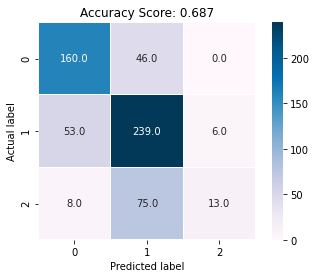

In [90]:


print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, y_pred_test),3)
cm1 = cm(y_test, y_pred_test)
sb.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
            square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")



In [95]:
print("Cohen Score",cohen_kappa_score(y_test, y_pred_test))
print("Matthew Score",matthews_corrcoef(y_test, y_pred_test))
print("\n")

Cohen Score 0.4507474314651604
Matthew Score 0.464122665248289




In [99]:
#accuracies = cross_val_score(estimator = lr, X = x_train, y = y_train, cv = 10)
#print("Accuracy (mean): %",accuracies.mean()*100)
#print("std: %",accuracies.std()*100

In [100]:
#scores = cross_val_score(lr, X_train, y_train, scoring='neg_mean_absolute_error', cv=10,)
#print ("MAE (mean): %" , scores.mean())

In [101]:
#accuracies = cross_val_score(estimator = svc, x = x_train, y = y_train, cv = 10)
#print("Accuracy (mean): %",accuracies.mean()*100)
#print("std: %",accuracies.std()*100)

#scores = cross_val_score(svc, x_train, y_train, scoring='neg_mean_absolute_error', cv=10,)
#print ("MAE (mean): %" , scores.mean())
#print("\n")
